In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

In [5]:
x=dataset.iloc[:,1:2].values

In [6]:
y=dataset.iloc[:,2:].values

In [7]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Text(0, 0.5, 'Salary')

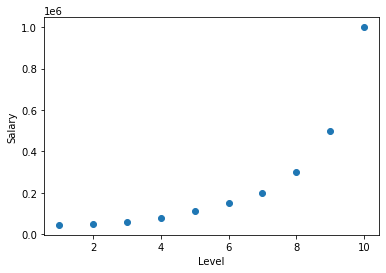

In [10]:
plt.scatter(dataset['Level'],dataset['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=lin_reg.predict(x)

In [13]:
y_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [14]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

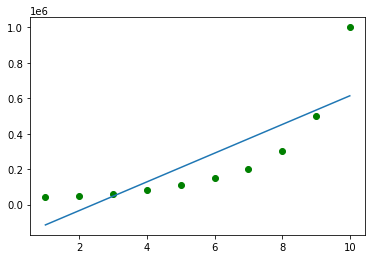

In [15]:
plt.scatter(x,y,color='green')
plt.plot(x,y_pred)

In [16]:
lin_reg.coef_

array([[80878.78787879]])

In [17]:
lin_reg.intercept_

array([-195333.33333333])

In [18]:
from sklearn.metrics import r2_score
accuraylinear = r2_score(y,y_pred)

In [20]:
accuraylinear*100 #33% we having loss

66.90412331929895

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)

In [70]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [50]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [51]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
pred=lin_reg_2.predict(x_poly)

In [53]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [55]:
accuracy_2 = r2_score(y,pred)
accuracy_2*100

99.73922891706613

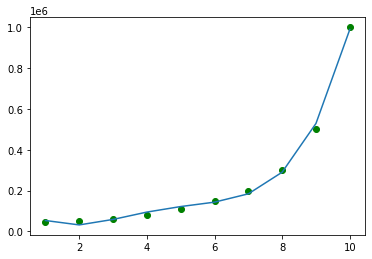

In [56]:
plt.scatter(x,y,color='green')
plt.plot(x,pred)

In [71]:
#level 3 position
lin_reg_2.predict([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]])

array([[53356.64335681]])

In [60]:
Y_pred_1=lin_reg.predict([[6]])

In [61]:
Y_pred_1

array([[289939.39393939]])

In [65]:
ploy_pred = lin_reg_2.predict(poly_reg.fit_transform([[14]]))
#ploy_pred = lin_reg_2.predict(polynomial features values)


In [66]:
ploy_pred

array([[7568962.70396364]])